In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [11]:
df = pd.read_csv("Student.csv")

In [12]:
df.head(7)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
5,3,78,0,9,6,61
6,7,73,1,5,6,63


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [14]:
df.shape

(10000, 6)

In [15]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [16]:
correlation = df.corr()
print(correlation)


                                  Hours Studied  Previous Scores  \
Hours Studied                          1.000000        -0.012390   
Previous Scores                       -0.012390         1.000000   
Extracurricular Activities             0.003873         0.008369   
Sleep Hours                            0.001245         0.005944   
Sample Question Papers Practiced       0.017463         0.007888   
Performance Index                      0.373730         0.915189   

                                  Extracurricular Activities  Sleep Hours  \
Hours Studied                                       0.003873     0.001245   
Previous Scores                                     0.008369     0.005944   
Extracurricular Activities                          1.000000    -0.023284   
Sleep Hours                                        -0.023284     1.000000   
Sample Question Papers Practiced                    0.013103     0.003990   
Performance Index                                   0.024525 

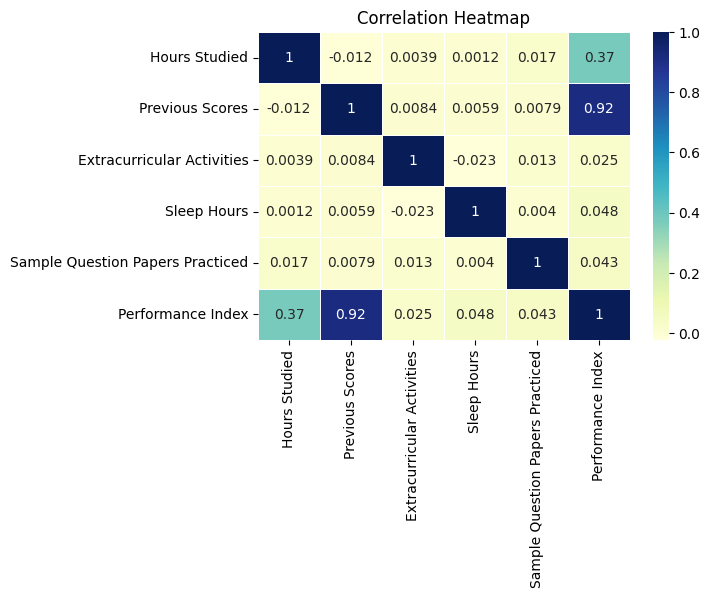

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
df = df.drop("Extracurricular Activities", axis=1)

In [20]:
df.head(4)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45
3,5,52,5,2,36


In [26]:
print(df.columns)

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


In [ ]:
X = df[['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced']]
y = df['Performance Index']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -33.464496579991554
Coefficients: [2.85918868 1.0157609  0.4692835  0.18039524]


In [31]:
y_pred = model.predict(X_test)
print("Predicted Performance Index:", y_pred)


Predicted Performance Index: [55.03400753 22.29917816 47.61939537 ... 26.96648323 57.23293408
 62.59581266]


In [35]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("Root Mean Squared Error:", rmse)


R² Score: 0.9884525095995261
Root Mean Squared Error: 2.0734540000892916


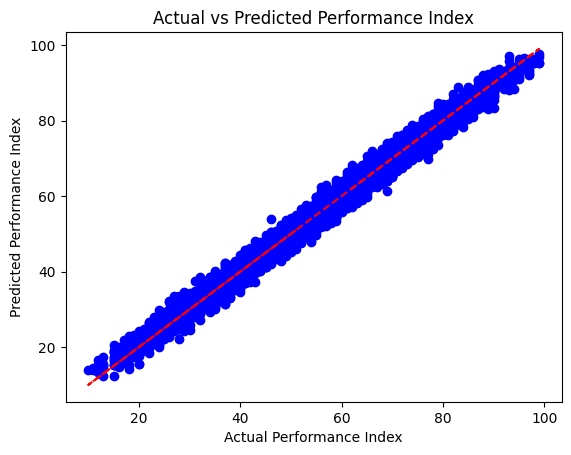

In [36]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')  # perfect line
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance Index")
plt.show()


In [37]:
features = X.columns
coefficients = model.coef_

for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")


Hours Studied: 2.8591886773050184
Previous Scores: 1.0157609020966936
Sleep Hours: 0.46928350149906406
Sample Question Papers Practiced: 0.1803952352901728


In [38]:
import joblib


In [39]:
# Save the trained model
joblib.dump(model, "performance_model.pkl")


['performance_model.pkl']